In [1]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt


In [2]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

Database exists, assume schema does, too.


In [4]:
prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

ValueError: Worksheet named 'SP1500_Sectors_Indexes_Prices' not found

In [ ]:
screener = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Screener")

In [ ]:
screener['Symbol']

In [ ]:
threshold = .9

In [ ]:
risk_trend_threshold = screener[['risk_trend']].quantile(q=[threshold])
risk_screened = screener[screener['risk_trend']>risk_trend_threshold['risk_trend'].values[0]]['Symbol'].values

In [ ]:
screener.columns

In [ ]:
above_1yearSDev = screener[screener['latest_p']>screener['mean_1y']+screener['std_1y']]['Symbol'].values
above_2yearSDev = screener[screener['latest_p']>screener['mean_2y']+screener['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)

In [ ]:
above_2year_t = screener[screener['2yr_pct']>threshold]['Symbol'].values
above_1year_t = screener[screener['1yr_pct']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)

In [ ]:
above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [ ]:
screened_final_set = np.intersect1d(risk_screened,above_combined)

In [ ]:
screened_final_set 

In [ ]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

#date_str = '10-27-2020'

dto = datetime.strptime(dates[0], '%Y-%m-%d').date()
#print(type(dto))
#print(dto)



In [ ]:
def myfunc(x):
    return slope * x + intercept

In [332]:
pd.plotting.plot_params = {'x_compat': True}

CERN


C:\Users\User\AppData\Local\Temp/ipykernel_16192/1824244520.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


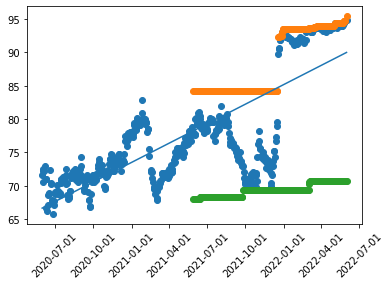

EXC


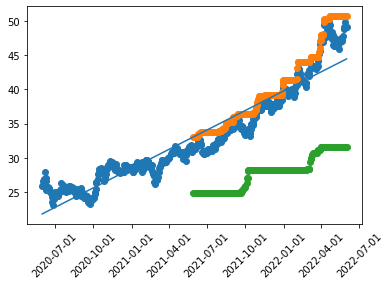

MCK


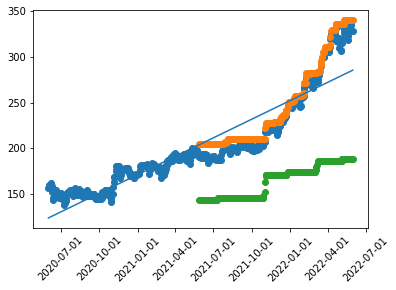

MTOR


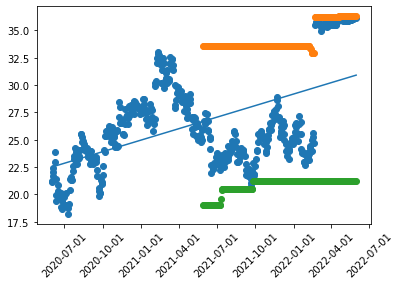

SJI


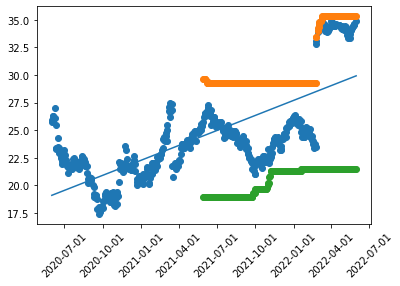

SO


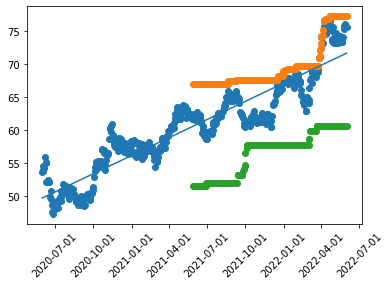

TVTY


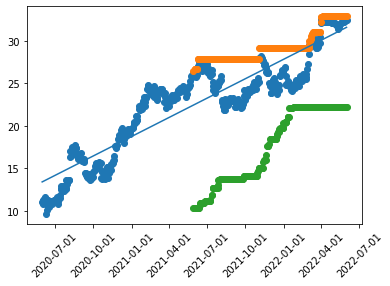

WRB


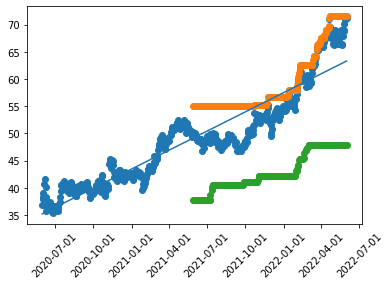

In [349]:
for s in screened_final_set:
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + mdates.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()